In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Classification with TItanic dataset
- Data from Kaggle's Titanic competition: [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

Variable description
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
data_file = 'data/titanic.csv'
titanic = pd.read_csv(data_file, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Embarked 변수 처리

Embarked 변수를 더미변수로 처리합니다. pandas의 get_dummies함수를 이용합니다.

In [4]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [5]:
embark_dum = pd.get_dummies(titanic['Embarked'], prefix='port')
embark_dum.sample(n = 10)

,port_C,port_Q,port_S
PassengerId,,,
150,False,False,True
25,False,False,True
791,False,True,False
465,False,False,True
190,False,False,True
699,True,False,False
748,False,False,True
402,False,False,True
613,False,True,False


In [6]:
embark_dum.drop(embark_dum.columns[2], axis=1, inplace=True)
embark_dum.sample(n = 10)

,port_C,port_Q
PassengerId,,
238,False,False
738,True,False
823,False,False
367,True,False
450,False,False
700,False,False
201,False,False
459,False,False
416,False,False


In [7]:
titanic = pd.concat([titanic, embark_dum], axis=1)
titanic.drop(['Embarked'], axis=1, inplace=True)

### Age 변수 처리
- 결측치 (missing value) 존재

In [8]:
age_group = []
for i in range (0, len(titanic)):
    age = titanic.iloc[i]['Age']
    age = 'child' if age < 20 else 'adult' if age >= 20 else 'unknown'
    age_group.append(age)

In [9]:
titanic['Age_modified'] = age_group

In [10]:
age_dum = pd.get_dummies(titanic['Age_modified'], prefix = 'Age')
age_dum.drop(age_dum.columns[2], axis=1, inplace=True)
age_dum.sample(n = 10)

,Age_adult,Age_child
PassengerId,,
462,True,False
443,True,False
91,True,False
24,True,False
157,False,True
342,True,False
682,True,False
598,True,False
784,False,False


In [11]:
titanic = pd.concat([titanic, age_dum], axis=1)
titanic.drop(['Age', 'Age_modified'], axis=1, inplace=True)

### Sex 처리

In [12]:
titanic['Sex'] = titanic['Sex'].map({'female':1, 'male':0})

In [13]:
titanic.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,port_C,port_Q,Age_adult,Age_child
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,NaN,False,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,True,False,True,False
3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,False,False,True,False
5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,NaN,False,False,True,False
6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,NaN,False,True,False,False
7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,E46,False,False,True,False
8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.0750,NaN,False,False,False,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,11.1333,NaN,False,False,True,False


우선 통계학적인 방법으로 계산해봅니다.


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'Survived ~ Pclass+Sex+SibSp+Parch+Fare+port_C+port_Q+Age_adult+Age_child'
# Fit the logistic regression model
model = smf.logit(formula, data=titanic).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.447577
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.3279
Time:                        20:50:03   Log-Likelihood:                -398.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.934e-78
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2587      0.409      0.632      0.527      -0.543       1.060
port_C[T

Odd ratio를 계산해봅니다.

In [15]:
# Calculate odds ratios
odds_ratios = np.exp(model.params)

# Print odds ratios
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
Intercept             1.295181
port_C[T.True]        1.576883
port_Q[T.True]        1.515300
Age_adult[T.True]     1.111197
Age_child[T.True]     2.747993
Pclass                0.401883
Sex                  15.402575
SibSp                 0.733820
Parch                 0.877658
Fare                  1.002528
dtype: float64


# Model 학습

sklearn에 있는 LogisticRegression 을 불러와서 모형을 생성합니다.\
metrics는 여러 평가지표를 의미합니다.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [17]:
feature_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'port_C', 'port_Q', 'Age_adult', 'Age_child']
X = titanic[feature_cols]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [18]:
logreg = LogisticRegression(C=1000)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.881978313673601), ('Sex', 2.698304715290479), ('SibSp', -0.3440738281855561), ('Parch', -0.07279222585779303), ('Fare', 0.0026151874855649105), ('port_C', 0.29929431676520063), ('port_Q', 0.48996968445746003), ('Age_adult', 0.2187284817631719), ('Age_child', 1.075872130766917)]


/Users/saintphs/Desktop/Dev/aSSIST_DM1/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(logreg.coef_)
print(logreg.coef_[0])

[[-8.81978314e-01  2.69830472e+00 -3.44073828e-01 -7.27922259e-02
   2.61518749e-03  2.99294317e-01  4.89969684e-01  2.18728482e-01
   1.07587213e+00]]
[-8.81978314e-01  2.69830472e+00 -3.44073828e-01 -7.27922259e-02
  2.61518749e-03  2.99294317e-01  4.89969684e-01  2.18728482e-01
  1.07587213e+00]


In [20]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [21]:
y_pred_class

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [22]:
y_pred_prob = logreg.predict_proba(X_test)

In [23]:
y_pred_prob

array([[0.28842739, 0.71157261],
       [0.89707993, 0.10292007],
       [0.53216589, 0.46783411],
       [0.6018306 , 0.3981694 ],
       [0.90650113, 0.09349887],
       [0.78829702, 0.21170298],
       [0.20475952, 0.79524048],
       [0.26377016, 0.73622984],
       [0.17435276, 0.82564724],
       [0.45076333, 0.54923667],
       [0.36657245, 0.63342755],
       [0.38834131, 0.61165869],
       [0.11657707, 0.88342293],
       [0.90409806, 0.09590194],
       [0.07096363, 0.92903637],
       [0.29328078, 0.70671922],
       [0.05314756, 0.94685244],
       [0.64306138, 0.35693862],
       [0.53211527, 0.46788473],
       [0.84182105, 0.15817895],
       [0.55315335, 0.44684665],
       [0.10950307, 0.89049693],
       [0.79391507, 0.20608493],
       [0.90808475, 0.09191525],
       [0.94007228, 0.05992772],
       [0.92838802, 0.07161198],
       [0.90413302, 0.09586698],
       [0.03575154, 0.96424846],
       [0.80009228, 0.19990772],
       [0.87794958, 0.12205042],
       [0.

In [24]:
# calculate classification accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.8161434977578476


# 5. How to evaluate the classification model

## Using confusion matrix

In [25]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[124  15]
 [ 26  58]]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [27]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 58
True Negatives: 124
False Positives: 15
False Negatives: 26


In [28]:
# calculate the sensitivity
print('Sensitivity:', TP / (TP + FN))

Sensitivity: 0.6904761904761905


In [29]:
# calculate the specificity
print('Specificity:', TN / (TN + FP))

Specificity: 0.8920863309352518


In [30]:
print(metrics.f1_score(y_test, y_pred_class))

0.7388535031847133


In [31]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       139
           1       0.79      0.69      0.74        84

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.82      0.81       223



### How about using other threshold?
- If y_pred_prob > 0.3, than y_pred_class = 1

In [32]:
test = logreg.predict_proba(X_test)
print(test)

[[0.28842739 0.71157261]
 [0.89707993 0.10292007]
 [0.53216589 0.46783411]
 [0.6018306  0.3981694 ]
 [0.90650113 0.09349887]
 [0.78829702 0.21170298]
 [0.20475952 0.79524048]
 [0.26377016 0.73622984]
 [0.17435276 0.82564724]
 [0.45076333 0.54923667]
 [0.36657245 0.63342755]
 [0.38834131 0.61165869]
 [0.11657707 0.88342293]
 [0.90409806 0.09590194]
 [0.07096363 0.92903637]
 [0.29328078 0.70671922]
 [0.05314756 0.94685244]
 [0.64306138 0.35693862]
 [0.53211527 0.46788473]
 [0.84182105 0.15817895]
 [0.55315335 0.44684665]
 [0.10950307 0.89049693]
 [0.79391507 0.20608493]
 [0.90808475 0.09191525]
 [0.94007228 0.05992772]
 [0.92838802 0.07161198]
 [0.90413302 0.09586698]
 [0.03575154 0.96424846]
 [0.80009228 0.19990772]
 [0.87794958 0.12205042]
 [0.4536479  0.5463521 ]
 [0.26879489 0.73120511]
 [0.79391507 0.20608493]
 [0.89253656 0.10746344]
 [0.69979037 0.30020963]
 [0.74251719 0.25748281]
 [0.90418872 0.09581128]
 [0.90416606 0.09583394]
 [0.20593306 0.79406694]
 [0.53004927 0.46995073]


In [33]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

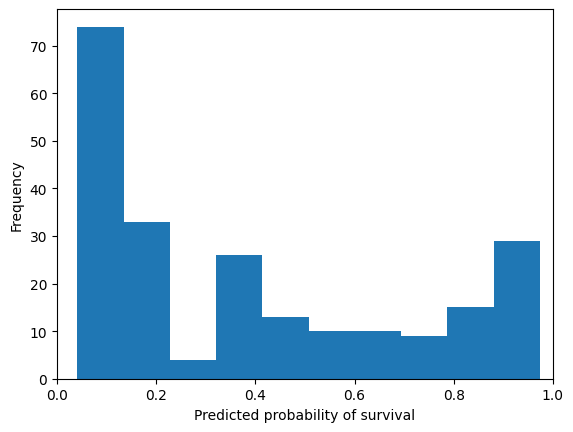

In [34]:
# histogram of predicted probabilities
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [35]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class_new = np.where(y_pred_prob >= 0.3, 1, 0)

In [36]:
y_pred_class_new

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [37]:
# old confusion matrix
print(confusion)

[[124  15]
 [ 26  58]]


In [38]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class_new)
print(confusion_new)

[[97 42]
 [12 72]]


In [39]:
TP = confusion_new[1][1]
TN = confusion_new[0][0]
FP = confusion_new[0][1]
FN = confusion_new[1][0]

In [40]:
# new sensitivity (higher than before)
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.8571428571428571


In [41]:
# new specificity (lower than before)
print('Specificity:', TN / float(TN + FP))

Specificity: 0.697841726618705


In [42]:
print(metrics.classification_report(y_test, y_pred_class_new))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       139
           1       0.63      0.86      0.73        84

    accuracy                           0.76       223
   macro avg       0.76      0.78      0.75       223
weighted avg       0.79      0.76      0.76       223



## ROC, auroc

### Drawing ROC curve and calculate AUC

In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [44]:
classifier = LogisticRegression()
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/Users/saintphs/Desktop/Dev/aSSIST_DM1/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/saintphs/Desktop/Dev/aSSIST_DM1/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [45]:
print(y_prob[0:10,:])

[[0.30801614 0.69198386]
 [0.88522933 0.11477067]
 [0.53966195 0.46033805]
 [0.60197359 0.39802641]
 [0.89982721 0.10017279]
 [0.78107641 0.21892359]
 [0.21971441 0.78028559]
 [0.27737943 0.72262057]
 [0.19556173 0.80443827]
 [0.44289832 0.55710168]]


In [46]:
print(y_score[0:10])

[ 0.80941047 -2.0429108  -0.15898181 -0.41369522 -2.19530611 -1.27195022
  1.26733143  0.95749791  1.41426818  0.22940757]


In [47]:
# fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8564148681055156


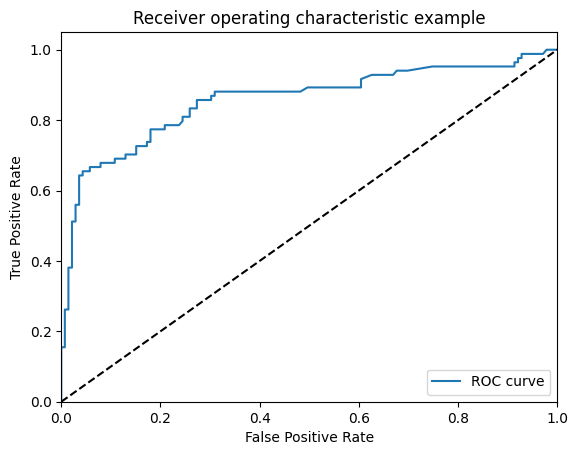

In [48]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [49]:
# ROC curve를 그리지 않고 바로 AUC를 계산해주는 함수
roc_auc_score(y_test, y_score)

0.8564148681055156